# Data Analysis using Python
The goal of data analysis is to give businesses actionable insights from the large amounts of data they receive every day. These insights can help organizations make decisions, solve problems, understand the needs of customers and identify future trends.<br>

In this Project, we will gather insight from data we cleaned on Project 1 or Project 2, we will gather insight by performing table/data frame calculation and simple data visualization. We will perform these process using Python with Jupyter Notebook.<br>


Python library used in this project: pandas, numpy, matplotlib and seaborn We will be using several question guides to gather useful information from our data<br>

Question 1: What was the best time for sales?<br>
Question 2: Which city sold the most product?<br>
Question 3: What time should we display advertisements to maximize likelihood of customer's buying product?<br>
Question 4: What products are most often sold together?<br>
Question 5: What product sold the most?<br>
Question 6: Is there any correlation between quantity sold of product and product price?

In [2]:
#Import Library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
# Read the new csv file in a new DataFrame 
sales = pd.read_csv("C:/Users/renal/Documents/Renaldo's File/Data Analyst Portofolio -Renaldo Livando/Project1 Data Wrangling using Python/out/cleaned_electronic_sales_data.csv")

# Check and review our dataframe
sales.head()

,Order ID,Order Date,Month,Product,Quantity Ordered,Price Each,Total Cost,Purchase Address,Street,City,State,Postal Code,Season
0,176558,2019-04-19 08:46:00,April,USB-C Charging Cable,2.0,11.95,23.90,"917 1st St, Dallas, TX 75001",917 1st St,Dallas,TX,75001,Spring
1,176559,2019-04-07 22:30:00,April,Bose SoundSport Headphones,1.0,99.99,99.99,"682 Chestnut St, Boston, MA 02215",682 Chestnut St,Boston,MA,2215,Spring
2,176560,2019-04-12 14:38:00,April,Google Phone,1.0,600.00,600.00,"669 Spruce St, Los Angeles, CA 90001",669 Spruce St,Los Angeles,CA,90001,Spring
3,176560,2019-04-12 14:38:00,April,Wired Headphones,1.0,11.99,11.99,"669 Spruce St, Los Angeles, CA 90001",669 Spruce St,Los Angeles,CA,90001,Spring
4,176561,2019-04-30 09:27:00,April,Wired Headphones,1.0,11.99,11.99,"333 8th St, Los Angeles, CA 90001",333 8th St,Los Angeles,CA,90001,Spring


## Question 1: What was the best time for sales?

For the first question, we will analyze at quarter level and month level.

In [4]:
#Change Order Date column into datetime
sales['Order Date'] = pd.to_datetime(sales['Order Date'])
quarter_col = sales['Order Date'].dt.to_period('Q')
quarter_col

#Do aggregation into Order Date column by quarter
quarter_sales = sales.groupby(quarter_col)['Total Cost'].sum().reset_index()
quarter_sales

,Order Date,Total Cost
0,2019Q1,6817794.30
1,2019Q2,9116114.36
2,2019Q3,6982010.38
3,2019Q4,11540948.61
4,2020Q1,8670.29


We found that outlier from our dataset. Lets give it a check

In [5]:
sales_2020 = sales.loc[(sales['Order Date'] >= '2020-01-01')]
sales_2020.shape[0]

34

In [6]:
sales_2020.tail()

,Order ID,Order Date,Month,Product,Quantity Ordered,Price Each,Total Cost,Purchase Address,Street,City,State,Postal Code,Season
50628,315315,2020-01-01 01:22:00,January,27in 4K Gaming Monitor,1.0,389.99,389.99,"552 North St, Austin, TX 73301",552 North St,Austin,TX,73301,Winter
52213,316833,2020-01-01 02:58:00,January,Vareebadd Phone,1.0,400.00,400.00,"378 Elm St, New York City, NY 10001",378 Elm St,New York City,NY,10001,Winter
52248,316867,2020-01-01 01:05:00,January,27in FHD Monitor,1.0,149.99,149.99,"137 Madison St, Seattle, WA 98101",137 Madison St,Seattle,WA,98101,Winter
54780,319308,2020-01-01 03:13:00,January,USB-C Charging Cable,1.0,11.95,11.95,"135 8th St, Boston, MA 02215",135 8th St,Boston,MA,2215,Winter
54842,319366,2020-01-01 00:45:00,January,20in Monitor,2.0,109.99,219.98,"746 South St, San Francisco, CA 94016",746 South St,San Francisco,CA,94016,Winter


We got that the data are just puchasement made in 1 January. Means this data not the entire report for January 2020.
So, the right decision is to filter it by excluded for our further calculation/analysis.<br><br>
Because we do time-series analysis, this filter step is necessary to make sure the consistency of our analysis.


In [7]:
#Filter the unwanted record
sales_2019 = sales.loc[(sales['Order Date'] >= '2019-01-01')
                     & (sales['Order Date'] < '2019-12-31')]

sales_filtered=sales_2019.copy()
sales_filtered['Order Date'] = pd.to_datetime(sales_filtered['Order Date'])
sales_filtered['Quarter'] = sales_filtered['Order Date'].dt.to_period('Q')

#Group by again our new data into quarter
quarter_sales_2019= sales_filtered.groupby('Quarter')['Total Cost'].sum().reset_index()

#Change datatype so we can do calculation and visualization in further analysis
quarter_sales_2019['Total Cost']=quarter_sales_2019['Total Cost'].astype(int)
quarter_sales_2019['Quarter']=quarter_sales_2019['Quarter'].astype(str)

#Substring column 'Quarter' to make it simple
quarter_sales_2019['Quarter']=quarter_sales_2019['Quarter'].str[-2:]
quarter_sales_2019

,Quarter,Total Cost
0,Q1,6817794
1,Q2,9116114
2,Q3,6982010
3,Q4,11409509


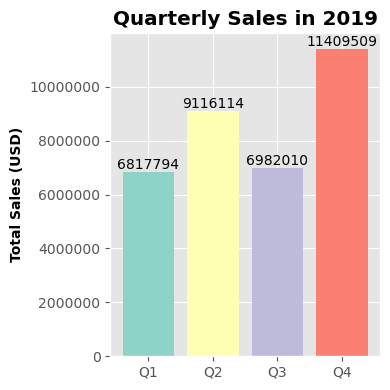

In [8]:
# Set the style of the chart
plt.style.use('ggplot')


# Create a figure size and axes
fig, ax = plt.subplots(figsize = (4,4))

# Set our ticklabel so won't present in scientific format
plt.ticklabel_format(style = 'plain')

# Set the x-axis values and the corresponding heights
x_values = quarter_sales_2019['Quarter']
y_values = quarter_sales_2019['Total Cost']

# Create an array of colors for the bars
colors = plt.cm.Set3(np.arange(len(x_values)))

# Create the bar chart with colored bars
ax.bar(x_values, y_values, color=colors)

# Add labels to the bars
for i, v in enumerate(y_values):
    ax.text(i, v, str(round(v, 2)), ha='center', va='bottom', fontweight = 'light')

# Set labels and title
ax.set_ylabel('Total Sales (USD)', fontweight = 'bold')
ax.set_title('Quarterly Sales in 2019', fontweight = 'bold')

# Display the chart
plt.tight_layout()
plt.show()

Now we analysis in month level

In [9]:
# Group by the month and see the best month for sales 

monthly_sales = sales.groupby('Month')['Total Cost'].sum().reset_index()

# Lets check the monthly sales 
monthly_sales

,Month,Total Cost
0,April,3389217.98
1,August,2241083.37
2,December,4608295.70
3,February,2200078.08
4,January,1821413.16
5,July,2646461.32
6,June,2576280.15
7,March,2804973.35
8,May,3150616.23
9,November,3197875.05


In [10]:
# Define the month order
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October',
                'November', 'December']

# Sort the DataFrame by the month order
monthly_sales_sorted_by_month = monthly_sales.sort_values(by='Month', key=lambda x: x.map({v: k for k, v in enumerate(month_order)}))

monthly_sales_sorted_by_month = monthly_sales_sorted_by_month.reset_index(drop = True)
monthly_sales_sorted_by_month['Total Cost']=monthly_sales_sorted_by_month['Total Cost'].astype(int)
monthly_sales_sorted_by_month

,Month,Total Cost
0,January,1821413
1,February,2200078
2,March,2804973
3,April,3389217
4,May,3150616
5,June,2576280
6,July,2646461
7,August,2241083
8,September,2094465
9,October,3734777


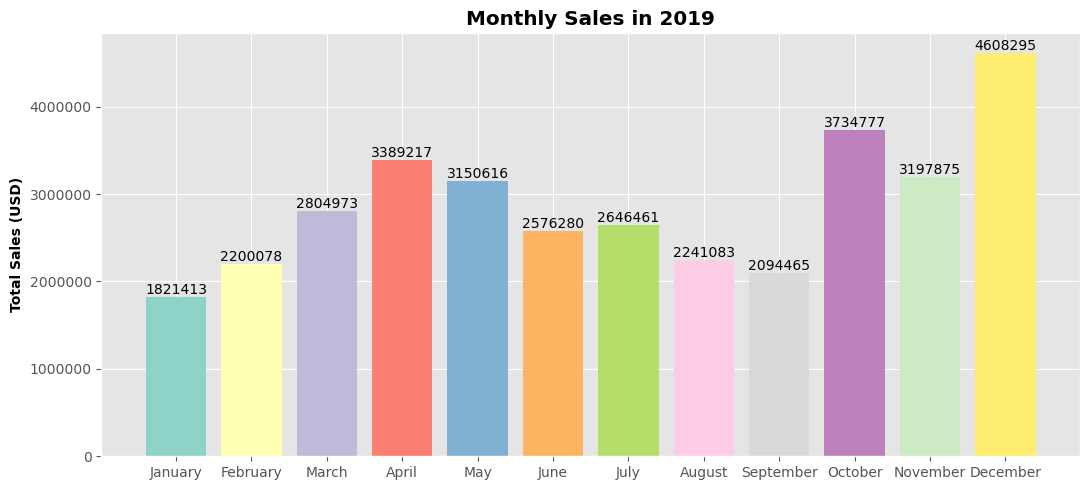

In [11]:
# Set the style of the chart
plt.style.use('ggplot')

# Create a figure size and axes
fig, ax = plt.subplots(figsize = (11,5))

# Set our ticklabel so won't present in scientific format
plt.ticklabel_format(style = 'plain')

# Set the x-axis values and the corresponding heights
x_values = monthly_sales_sorted_by_month['Month']
y_values = monthly_sales_sorted_by_month['Total Cost']

# Create an array of colors for the bars
colors = plt.cm.Set3(np.arange(len(x_values)))

# Create the bar chart with colored bars
ax.bar(x_values, y_values, color=colors)

# Add labels to the bars
for i, v in enumerate(y_values):
    ax.text(i, v, str(round(v, 2)), ha='center', va='bottom', fontweight = 'light')

# Set labels and title
ax.set_ylabel('Total Sales (USD)', fontweight = 'bold')
ax.set_title('Monthly Sales in 2019', fontweight = 'bold')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=0)

# Display the chart
plt.tight_layout()
plt.show()

With these analyses we can answer the first question.<br>
The best time for sales from consideration by sales data in 2019 is on quarter 4 and on December.

## Question2: Which city sold the most product? 

In [12]:
top_city2 = sales.groupby('City')['Quantity Ordered'].sum().reset_index()
top_city2['Quantity Ordered']=top_city2['Quantity Ordered'].astype(int)
top_city2

,City,Quantity Ordered
0,Atlanta,16584
1,Austin,11137
2,Boston,22494
3,Dallas,16707
4,Los Angeles,33247
5,New York City,27903
6,Portland,14037
7,San Francisco,50169
8,Seattle,16534


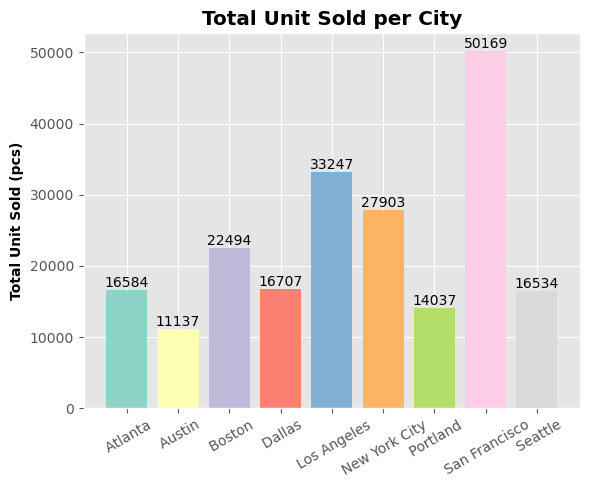

In [13]:
plt.style.use('ggplot')

fig, ax = plt.subplots(figsize = (6,5))

plt.ticklabel_format(style = 'plain')

x_values = top_city2['City']
y_values = top_city2['Quantity Ordered']

colors = plt.cm.Set3(np.arange(len(x_values)))

ax.bar(x_values, y_values, color=colors)

for i, v in enumerate(y_values):
    ax.text(i, v, str(round(v, 2)), ha='center', va='bottom', fontweight = 'light')

ax.set_ylabel('Total Unit Sold (pcs)', fontweight = 'bold')
ax.set_title('Total Unit Sold per City', fontweight = 'bold')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=30)

plt.tight_layout()
plt.show()

In [14]:
top_city = sales.groupby('City')['Total Cost'].sum().reset_index()
top_city['Total Cost']=top_city['Total Cost'].astype(int)
#Sort dataframe by Total Cost
top_city.sort_values(by=['Total Cost'], ascending=False).head(1)

,City,Total Cost
7,San Francisco,8254743


With these analysis we can answer the second question. <br>
City with the most sold product is San Fransisco with 50,169 units sold and sales about $8 million.

## Question3: What time should we display advertisements to maximize likelihood of customer's buying product?
..

In [15]:
sales_copy=sales
sales_copy['Hour'] = sales_copy['Order Date'].dt.hour
sales_copy.head()

,Order ID,Order Date,Month,Product,Quantity Ordered,Price Each,Total Cost,Purchase Address,Street,City,State,Postal Code,Season,Hour
0,176558,2019-04-19 08:46:00,April,USB-C Charging Cable,2.0,11.95,23.90,"917 1st St, Dallas, TX 75001",917 1st St,Dallas,TX,75001,Spring,8
1,176559,2019-04-07 22:30:00,April,Bose SoundSport Headphones,1.0,99.99,99.99,"682 Chestnut St, Boston, MA 02215",682 Chestnut St,Boston,MA,2215,Spring,22
2,176560,2019-04-12 14:38:00,April,Google Phone,1.0,600.00,600.00,"669 Spruce St, Los Angeles, CA 90001",669 Spruce St,Los Angeles,CA,90001,Spring,14
3,176560,2019-04-12 14:38:00,April,Wired Headphones,1.0,11.99,11.99,"669 Spruce St, Los Angeles, CA 90001",669 Spruce St,Los Angeles,CA,90001,Spring,14
4,176561,2019-04-30 09:27:00,April,Wired Headphones,1.0,11.99,11.99,"333 8th St, Los Angeles, CA 90001",333 8th St,Los Angeles,CA,90001,Spring,9


In [16]:
best_time = sales_copy.groupby('Hour')['Order ID'].count().reset_index()
best_time.head()

,Hour,Order ID
0,0,3902
1,1,2347
2,2,1242
3,3,830
4,4,852


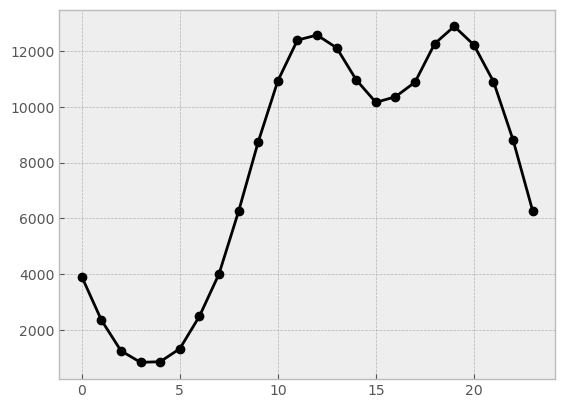

In [17]:
plt.style.use('bmh')

plt.plot(best_time['Hour'], best_time['Order ID'], marker='o', linestyle='-', color='black')

# Show plot
plt.show()

We can found there's 2 peak hours in our line chart. <br>
With these analysis we can answer the third question. <br>
Best time should we display advertisements to maximize likelihood of customer's buying product is between 11 am - 1 pm and between 6 pm - 8 pm

## Question4: What products are most often sold together?
.

In [18]:
# Create a new DataFrame with all the duplicated OrderID's 
sales_duplicatedID = sales[sales['Order ID'].duplicated(keep = False)].copy()

# Create a new column 'Grouped' with all the products related to the Order ID
sales_duplicatedID['Grouped'] = sales_duplicatedID.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

# Reset the index 
sales_duplicatedID = sales_duplicatedID.reset_index(drop = True)

sales_duplicatedID.head()

,Order ID,Order Date,Month,Product,Quantity Ordered,Price Each,Total Cost,Purchase Address,Street,City,State,Postal Code,Season,Hour,Grouped
0,176560,2019-04-12 14:38:00,April,Google Phone,1.0,600.00,600.00,"669 Spruce St, Los Angeles, CA 90001",669 Spruce St,Los Angeles,CA,90001,Spring,14,"Google Phone,Wired Headphones"
1,176560,2019-04-12 14:38:00,April,Wired Headphones,1.0,11.99,11.99,"669 Spruce St, Los Angeles, CA 90001",669 Spruce St,Los Angeles,CA,90001,Spring,14,"Google Phone,Wired Headphones"
2,176574,2019-04-03 19:42:00,April,Google Phone,1.0,600.00,600.00,"20 Hill St, Los Angeles, CA 90001",20 Hill St,Los Angeles,CA,90001,Spring,19,"Google Phone,USB-C Charging Cable"
3,176574,2019-04-03 19:42:00,April,USB-C Charging Cable,1.0,11.95,11.95,"20 Hill St, Los Angeles, CA 90001",20 Hill St,Los Angeles,CA,90001,Spring,19,"Google Phone,USB-C Charging Cable"
4,176586,2019-04-10 17:00:00,April,AAA Batteries (4-pack),2.0,2.99,5.98,"365 Center St, San Francisco, CA 94016",365 Center St,San Francisco,CA,94016,Spring,17,"AAA Batteries (4-pack),Google Phone"


In [19]:
# Removing duplicated columns 
sales_duplicatedID = sales_duplicatedID.drop_duplicates(subset = 'Order ID').reset_index(drop = True)

# Check the Data Frame
sales_duplicatedID.head()

,Order ID,Order Date,Month,Product,Quantity Ordered,Price Each,Total Cost,Purchase Address,Street,City,State,Postal Code,Season,Hour,Grouped
0,176560,2019-04-12 14:38:00,April,Google Phone,1.0,600.00,600.00,"669 Spruce St, Los Angeles, CA 90001",669 Spruce St,Los Angeles,CA,90001,Spring,14,"Google Phone,Wired Headphones"
1,176574,2019-04-03 19:42:00,April,Google Phone,1.0,600.00,600.00,"20 Hill St, Los Angeles, CA 90001",20 Hill St,Los Angeles,CA,90001,Spring,19,"Google Phone,USB-C Charging Cable"
2,176586,2019-04-10 17:00:00,April,AAA Batteries (4-pack),2.0,2.99,5.98,"365 Center St, San Francisco, CA 94016",365 Center St,San Francisco,CA,94016,Spring,17,"AAA Batteries (4-pack),Google Phone"
3,176672,2019-04-12 11:07:00,April,Lightning Charging Cable,1.0,14.95,14.95,"778 Maple St, New York City, NY 10001",778 Maple St,New York City,NY,10001,Spring,11,"Lightning Charging Cable,USB-C Charging Cable"
4,176681,2019-04-20 10:39:00,April,Apple Airpods Headphones,1.0,150.00,150.00,"331 Cherry St, Seattle, WA 98101",331 Cherry St,Seattle,WA,98101,Spring,10,"Apple Airpods Headphones,ThinkPad Laptop"


In [28]:
# Create a new DataFrame to store the combinations and counts
combination_counts = pd.DataFrame(columns=['Combination', 'Count'])

# Iterate over the 'Grouped' column and count the combinations
for combination, count in sales_duplicatedID['Grouped'].value_counts().items():
    combination_counts = pd.concat([combination_counts, pd.DataFrame({'Combination': [combination], 'Count': [count]})])

# Reset the index of the new DataFrame
combination_counts = combination_counts.sort_values(by='Count', ascending=False).reset_index(drop=True)

# Display the Top 5 Combinations 
top_five_combinations = combination_counts.head(5)

# Display the new DataFrame
top_five_combinations

,Combination,Count
0,"iPhone,Lightning Charging Cable",886
1,"Google Phone,USB-C Charging Cable",857
2,"iPhone,Wired Headphones",361
3,"Vareebadd Phone,USB-C Charging Cable",312
4,"Google Phone,Wired Headphones",303


In [32]:
# Give a check

# Reset the index of the new DataFrame
combination_counts2 = combination_counts.sort_values(by='Combination', ascending=False).reset_index(drop=True)

x5= combination_counts2
print(x5.to_string())

                                                                                Combination Count
0                                          iPhone,Wired Headphones,Lightning Charging Cable     1
1                                                                   iPhone,Wired Headphones   361
2                                                                    iPhone,Vareebadd Phone     3
3                                                               iPhone,USB-C Charging Cable    12
4                                                                    iPhone,ThinkPad Laptop     4
5                                                                 iPhone,Macbook Pro Laptop     3
6                     iPhone,Lightning Charging Cable,Wired Headphones,USB-C Charging Cable     1
7                    iPhone,Lightning Charging Cable,Wired Headphones,AA Batteries (4-pack)     1
8                                          iPhone,Lightning Charging Cable,Wired Headphones    56
9                   

### In this check we found that the count is not really valid, its because the calculation of 2 combination separated with 3 combination products. We will revise this later

latest update by owner: 25/08/2023

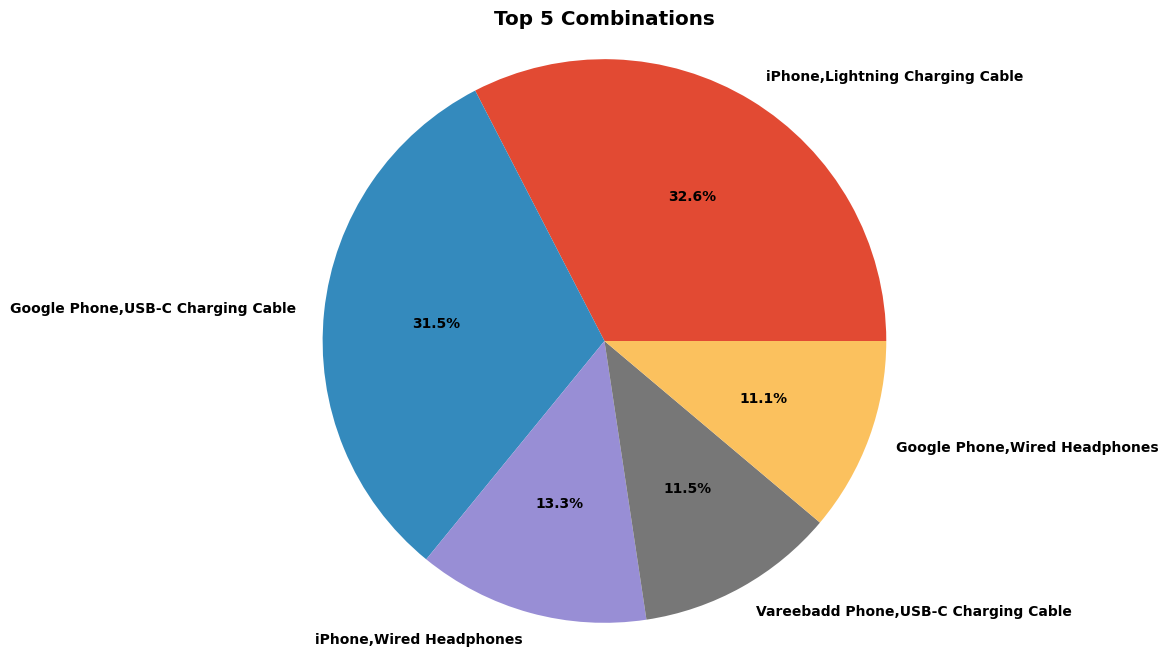

In [21]:
# Create a pie chart for the top ten combinations
plt.style.use('ggplot')

# Set the figure size
plt.figure(figsize=(8, 8))  
plt.pie(top_five_combinations['Count'], labels=top_five_combinations['Combination'], autopct='%1.1f%%', textprops={'weight': 'bold'})
plt.title('Top 5 Combinations', fontweight = 'bold')

# Equal aspect ratio to ensure that pie is drawn as a circle
plt.axis('equal') 

# Show the plot 
plt.show()

With this analysis we can answer the fourth question<br>
Products are most often sold together is IPhone & Lightning Charging Cable with 32.6% portion in top 5 combination products.

## Question5: What product sold the most?

In [22]:
# Group data by Product w.r.t. Quantity Ordered
products_sold = sales.groupby('Product')['Quantity Ordered'].sum().reset_index()

# Check the DataFrame 
products_sold

,Product,Quantity Ordered
0,20in Monitor,4126.0
1,27in 4K Gaming Monitor,6239.0
2,27in FHD Monitor,7541.0
3,34in Ultrawide Monitor,6192.0
4,AA Batteries (4-pack),27615.0
5,AAA Batteries (4-pack),30986.0
6,Apple Airpods Headphones,15637.0
7,Bose SoundSport Headphones,13430.0
8,Flatscreen TV,4813.0
9,Google Phone,5529.0


In [23]:
top_products_sold = products_sold.nlargest(20, 'Quantity Ordered').reset_index(drop = True)

top_products_sold['Quantity Ordered'] = top_products_sold['Quantity Ordered'].astype(int)

top_products_sold

,Product,Quantity Ordered
0,AAA Batteries (4-pack),30986
1,AA Batteries (4-pack),27615
2,USB-C Charging Cable,23931
3,Lightning Charging Cable,23169
4,Wired Headphones,20524
5,Apple Airpods Headphones,15637
6,Bose SoundSport Headphones,13430
7,27in FHD Monitor,7541
8,iPhone,6847
9,27in 4K Gaming Monitor,6239


C:\Users\renal\AppData\Local\Temp\ipykernel_120\2446452739.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


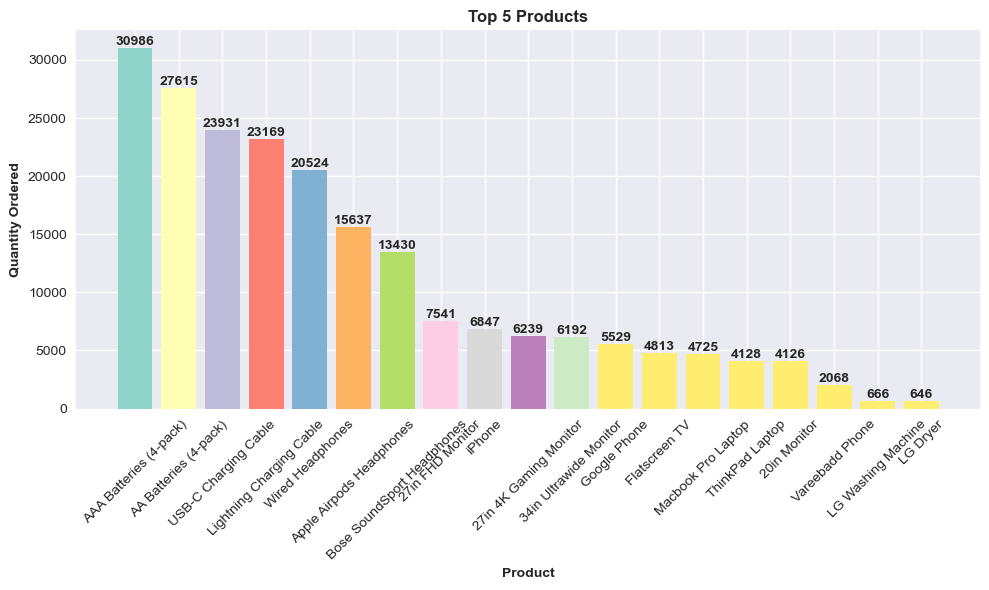

In [24]:
# Set the style of the chart
plt.style.use('seaborn')

# Create a figure and axes
fig, ax = plt.subplots(figsize = (10,6))

# Set the x-axis values and the corresponding heights
x_values = top_products_sold['Product']
y_values = top_products_sold['Quantity Ordered']

# Create an array of colors for the bars
colors = plt.cm.Set3(np.arange(len(x_values)))

# Create the bar chart with colored bars
ax.bar(x_values, y_values, color=colors)

# Add labels to the bars
for i, v in enumerate(y_values):
    ax.text(i, v, str(round(v, 2)), ha='center', va='bottom', fontweight = 'bold')
    
# Set labels and title
ax.set_xlabel('Product', fontweight = 'bold')
ax.set_ylabel('Quantity Ordered', fontweight = 'bold')
ax.set_title('Top 5 Products', fontweight = 'bold')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Display the chart
plt.tight_layout()
plt.show()

With this analysis we can answer the fourth question<br>
AAA Batteries (4-pack) is the product sold the most.

## Question 6: Is there any correlation between quantity sold of product and product price?

C:\Users\renal\AppData\Local\Temp\ipykernel_120\707964191.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


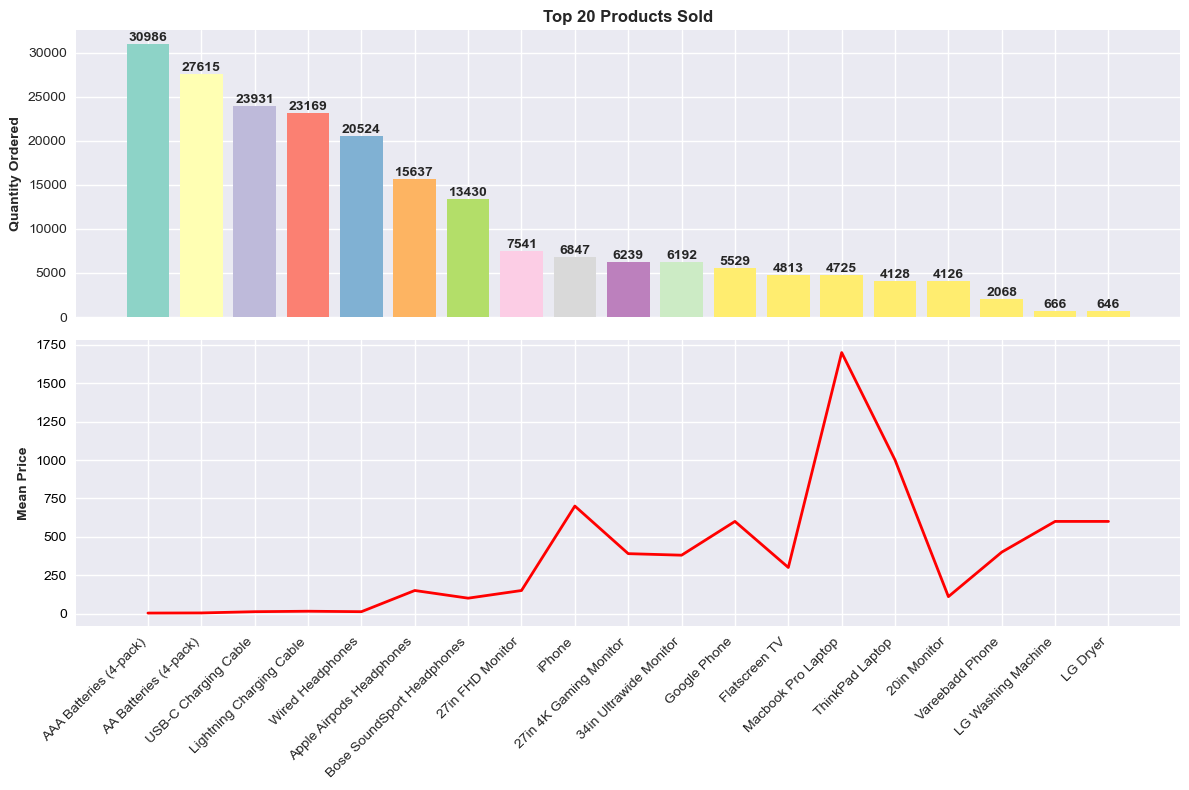

In [25]:
# Set the style of the chart
plt.style.use('seaborn')

# Create a figure and axes for the bar graph
fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=True, figsize=(12, 8))

# Set the x-axis values and the corresponding heights for the bar graph
x_values = top_products_sold['Product']
y_values = top_products_sold['Quantity Ordered']

# Create an array of colors for the bars
colors = plt.cm.Set3(np.arange(len(x_values)))

# Create the bar chart with colored bars
ax1.bar(x_values, y_values, color=colors, label='Quantity Ordered')

# Add labels to the bars
for i, v in enumerate(y_values):
    ax1.text(i, v, str(round(v, 2)), ha='center', va='bottom', fontweight='bold')

# Set labels and title for the bar graph
ax1.set_ylabel('Quantity Ordered', fontweight='bold')
ax1.set_title('Top 20 Products Sold', fontweight='bold')

# Plot the line graph for mean prices
mean_prices = sales.groupby('Product')['Price Each'].mean().loc[top_products_sold['Product']]
ax2.plot(mean_prices.index, mean_prices.values, color='red', linewidth=2)

# Set ylabel and intervals for the line graph y-axis
ax2.set_ylabel('Mean Price', fontweight='bold')
ax2.tick_params(axis='y', colors='black')

# Adjust the spacing and rotation of x-axis labels
plt.xticks(rotation=45, ha='right')
plt.subplots_adjust(bottom=0.3)

# Display the chart
plt.tight_layout()
plt.show()

So, this does show a certain level of correlation as the the quantites more sold are of very less prices like batteries, charging cable etc.

A little inconsitency can be seen with the MacBook Pro and Thinkpad. Even with higher prices than LG Washing Machines they are demanded more.